In [1]:
import os.path
import numpy as np
import requests
import time
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import aqi
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
from plotly.subplots import make_subplots
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
import ast
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.image as mpimg
from sklearn.metrics import precision_recall_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import make_pipeline
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Excel file
air_quality = pd.read_csv('data_2/air_data.csv')
#air_quality = pd.read_excel('target/air_quality.xlsx')

# View first 20 rows of the dataset
air_quality.head(20)

,date,pm25,pm10,o3,no2,so2,co,city,coordinates
0,1/1/2014,,196,30,11,9,19,MM-Delhi,"[28.6341,77.2005]"
1,1/1/2014,,199,20,45,4,15,RKP-Delhi,"[28.5648,77.1744]"
2,1/2/2014,311,181,42,14,5,22,MM-Delhi,"[28.6341,77.2005]"
3,1/2/2014,268,194,38,49,4,18,RKP-Delhi,"[28.5648,77.1744]"
4,1/3/2014,266,253,37,63,7,29,RKP-Delhi,"[28.5648,77.1744]"
5,1/3/2014,262,188,48,13,7,28,MM-Delhi,"[28.6341,77.2005]"
6,1/4/2014,272,348,8,31,7,46,MM-Delhi,"[28.6341,77.2005]"
7,1/4/2014,250,480,6,67,7,40,RKP-Delhi,"[28.5648,77.1744]"
8,1/5/2014,390,661,16,74,5,36,RKP-Delhi,"[28.5648,77.1744]"
9,1/5/2014,393,333,27,19,4,39,MM-Delhi,"[28.6341,77.2005]"


In [3]:
# Read last 20 rows of air quality dataset
air_quality.tail(20)

,date,pm25,pm10,o3,no2,so2,co,city,coordinates
13156,2/8/2024,153,83,21,9,1,6,DCNS-Delhi,"[28.612498,77.237388]"
13157,2/9/2024,154,107,42,24,11,4,RKP-Delhi,"[28.5648,77.1744]"
13158,2/9/2024,151,145,41,8,5,33,Greater Noida,"[28.557054,77.453663]"
13159,2/9/2024,160,118,6,10,1,7,Pusa-Delhi,"[28.636997, 77.172248]"
13160,2/9/2024,150,85,24,13,1,10,DCNS-Delhi,"[28.612498,77.237388]"
13161,2/9/2024,153,87,8,19,1,12,MM-Delhi,"[28.6341,77.2005]"
13162,2/10/2024,147,160,6,25,1,14,MM-Delhi,"[28.6341,77.2005]"
13163,2/10/2024,146,298,39,9,6,28,Greater Noida,"[28.557054,77.453663]"
13164,2/10/2024,158,188,39,29,11,12,RKP-Delhi,"[28.5648,77.1744]"
13165,2/10/2024,148,164,32,17,2,15,DCNS-Delhi,"[28.612498,77.237388]"


# Data Preprocessing

In [4]:
# check structure
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         13176 non-null  object
 1   pm25         13176 non-null  object
 2   pm10         13176 non-null  object
 3   o3           13176 non-null  object
 4   no2          13176 non-null  object
 5   so2          13176 non-null  object
 6   co           13176 non-null  object
 7   city         13176 non-null  object
 8   coordinates  13176 non-null  object
dtypes: object(9)
memory usage: 926.6+ KB


In [5]:
# 'coordinates' column contains strings like "[latitude, longitude]"
air_quality['coordinates'] = air_quality['coordinates'].apply(ast.literal_eval)

# Separate 'coordinates' column into 'latitude' and 'longitude'
air_quality[['latitude', 'longitude']] = pd.DataFrame(air_quality['coordinates'].tolist(), index=air_quality.index)

# Drop the original 'coordinates' column
air_quality = air_quality.drop('coordinates', axis=1)

# convert numeric columns to the appropriate data type
numeric_columns = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'latitude', 'longitude']

for col in numeric_columns:
    air_quality[col] = pd.to_numeric(air_quality[col], errors='coerce')

# Convert 'date' column to datetime format
air_quality['date'] = pd.to_datetime(air_quality['date'])

# Display the data types after conversion
print(air_quality.dtypes)

date         datetime64[ns]
pm25                float64
pm10                float64
o3                  float64
no2                 float64
so2                 float64
co                  float64
city                 object
latitude            float64
longitude           float64
dtype: object


In [6]:
# info
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       13176 non-null  datetime64[ns]
 1   pm25       12812 non-null  float64       
 2   pm10       12961 non-null  float64       
 3   o3         12828 non-null  float64       
 4   no2        12956 non-null  float64       
 5   so2        12499 non-null  float64       
 6   co         12495 non-null  float64       
 7   city       13176 non-null  object        
 8   latitude   13176 non-null  float64       
 9   longitude  13176 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 1.0+ MB


In [7]:
# descriptive analysis
air_quality.describe(include= "all", datetime_is_numeric=True)

,date,pm25,pm10,o3,no2,so2,co,city,latitude,longitude
count,13176,12812.000000,12961.000000,12828.000000,12956.000000,12499.000000,12495.000000,13176,13176.000000,13176.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RKP-Delhi,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3638,NaN,NaN
mean,2020-02-05 08:09:10.819672064,169.841321,142.311241,27.288432,23.836524,6.346428,11.459784,NaN,28.602969,77.223848
min,2014-01-01 00:00:00,13.000000,3.000000,1.000000,1.000000,1.000000,1.000000,NaN,28.557054,77.172248
25%,2018-05-02 00:00:00,117.000000,80.000000,11.000000,14.000000,3.000000,7.000000,NaN,28.564800,77.174400
50%,2020-06-26 12:00:00,158.000000,121.000000,21.000000,21.000000,5.000000,10.000000,NaN,28.612498,77.200500
75%,2022-04-17 00:00:00,206.000000,175.000000,37.000000,31.000000,8.000000,14.000000,NaN,28.634100,77.237388
max,2024-02-13 00:00:00,999.000000,933.000000,219.000000,250.000000,96.000000,159.000000,NaN,28.636997,77.453663


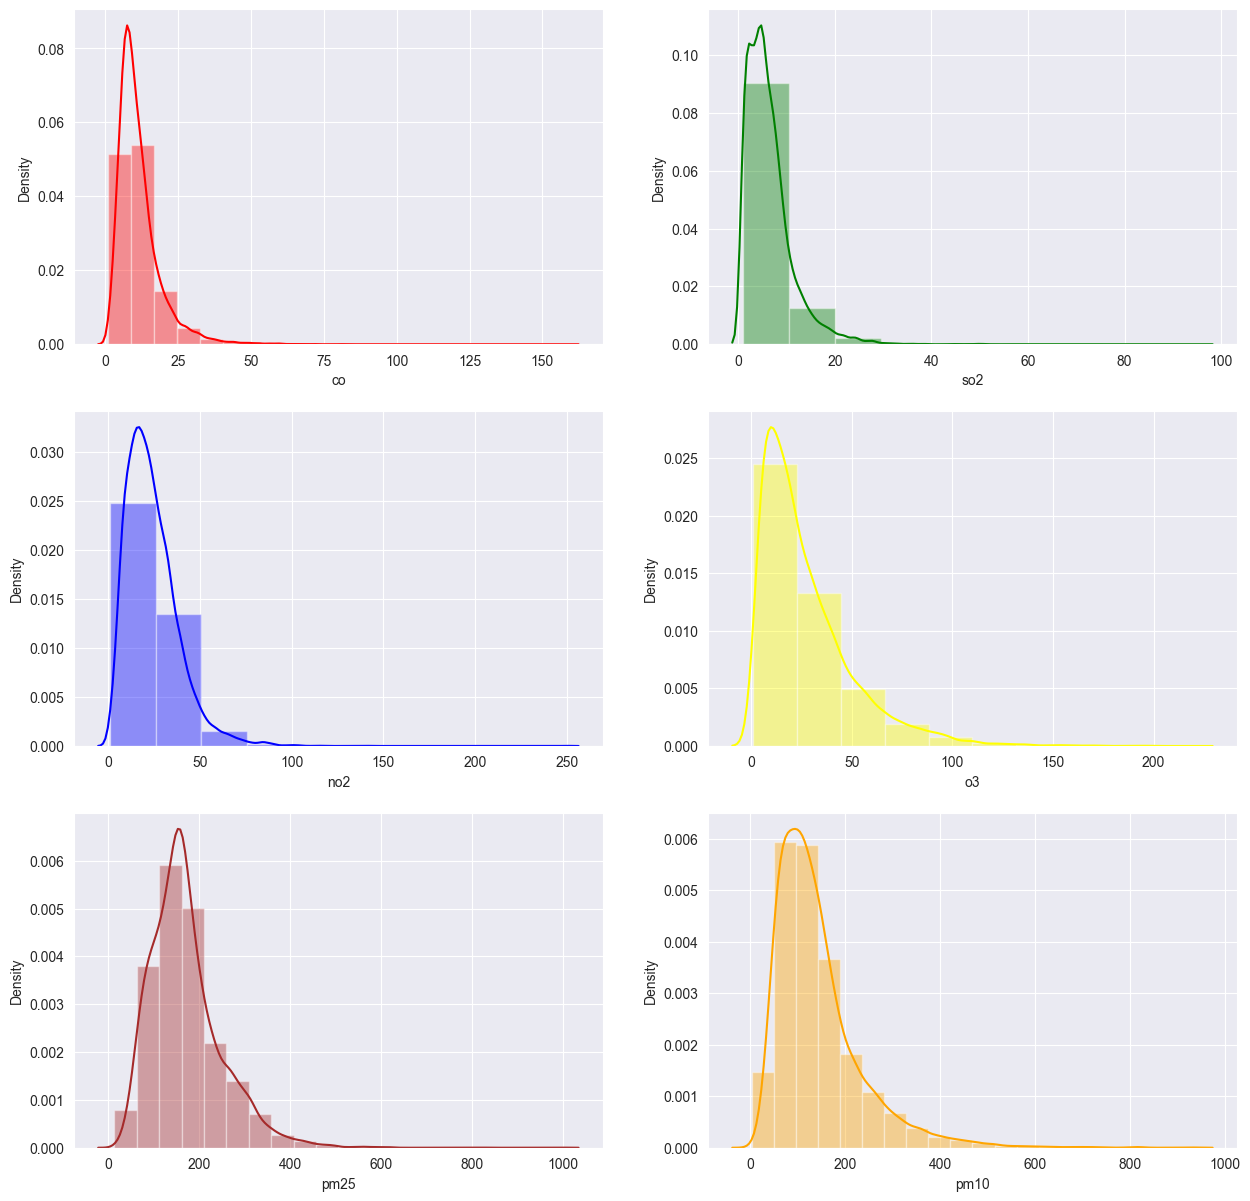

In [8]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(air_quality['co'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(air_quality['so2'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(air_quality['no2'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(air_quality['o3'],bins = 10, color = 'yellow')
plt.subplot(4,2,5)
sns.distplot(air_quality['pm25'],bins = 20,color = 'brown')
plt.subplot(4,2,6)
sns.distplot(air_quality['pm10'],bins = 20,color = 'orange')
plt.show()

In [9]:

# Assuming 'date' column is in datetime format
air_quality['year'] = air_quality['date'].dt.year


In [10]:
# copy dataset
aq_aqi = air_quality.copy()
aq_aqi.head()

,date,pm25,pm10,o3,no2,so2,co,city,latitude,longitude,year
0,2014-01-01,NaN,196.0,30.0,11.0,9.0,19.0,MM-Delhi,28.6341,77.2005,2014
1,2014-01-01,NaN,199.0,20.0,45.0,4.0,15.0,RKP-Delhi,28.5648,77.1744,2014
2,2014-01-02,311.0,181.0,42.0,14.0,5.0,22.0,MM-Delhi,28.6341,77.2005,2014
3,2014-01-02,268.0,194.0,38.0,49.0,4.0,18.0,RKP-Delhi,28.5648,77.1744,2014
4,2014-01-03,266.0,253.0,37.0,63.0,7.0,29.0,RKP-Delhi,28.5648,77.1744,2014


In [11]:
# Check missing Values
aq_aqi.isna().sum()

date           0
pm25         364
pm10         215
o3           348
no2          220
so2          677
co           681
city           0
latitude       0
longitude      0
year           0
dtype: int64

In [12]:
# Drop missing values
aq_df = aq_aqi.dropna()


In [13]:
# check missing values after dropping
aq_df.isna().sum()

date         0
pm25         0
pm10         0
o3           0
no2          0
so2          0
co           0
city         0
latitude     0
longitude    0
year         0
dtype: int64

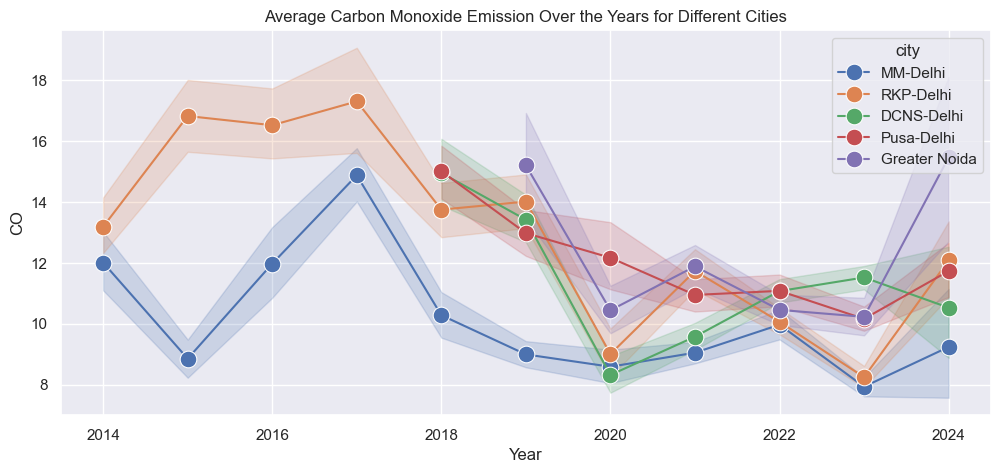

In [14]:
# carbon monoxide emission
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='co', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('CO')
plt.title('Average Carbon Monoxide Emission Over the Years for Different Cities')

# Show the plot
plt.show()

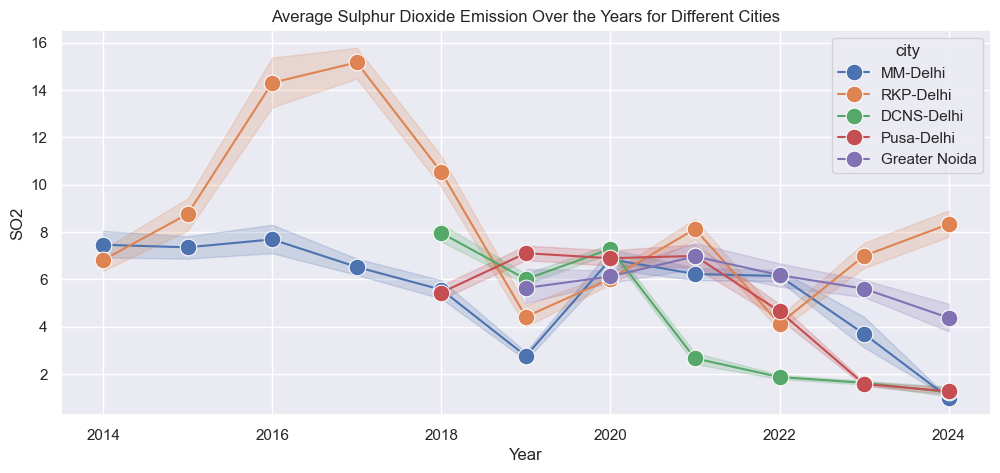

In [15]:
# Sulphur Dioxide Emission
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='so2', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('SO2')
plt.title('Average Sulphur Dioxide Emission Over the Years for Different Cities')

# Show the plot
plt.show()

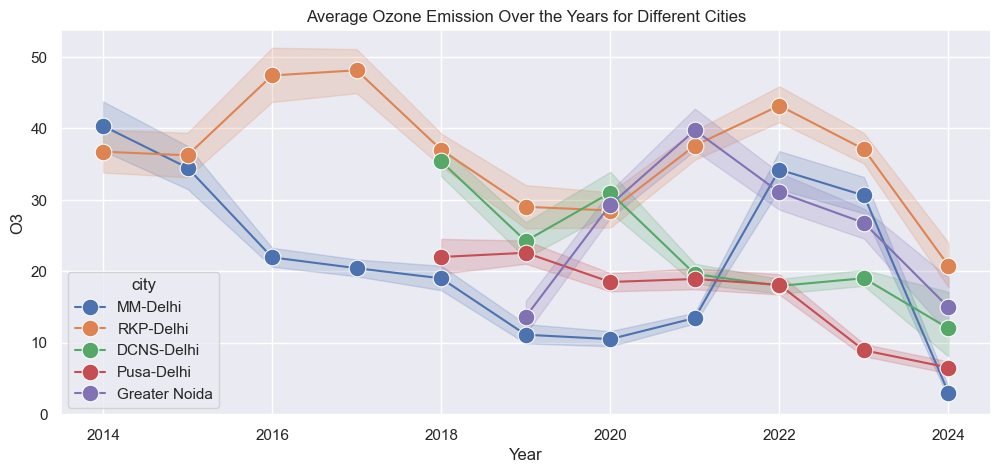

In [16]:
# Ozone Emission
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='o3', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('O3')
plt.title('Average Ozone Emission Over the Years for Different Cities')

# Show the plot
plt.show()

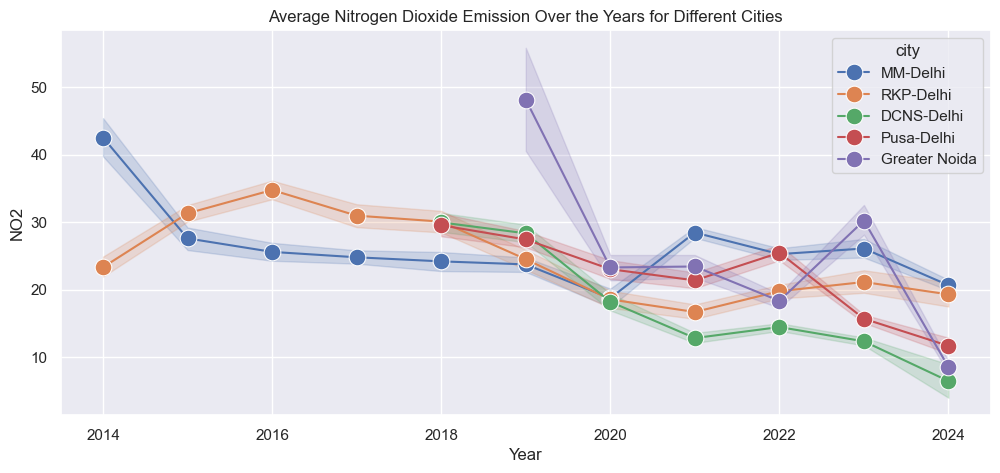

In [17]:
# Nitrogen Dioxide Emission
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='no2', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('NO2')
plt.title('Average Nitrogen Dioxide Emission Over the Years for Different Cities')

# Show the plot
plt.show()

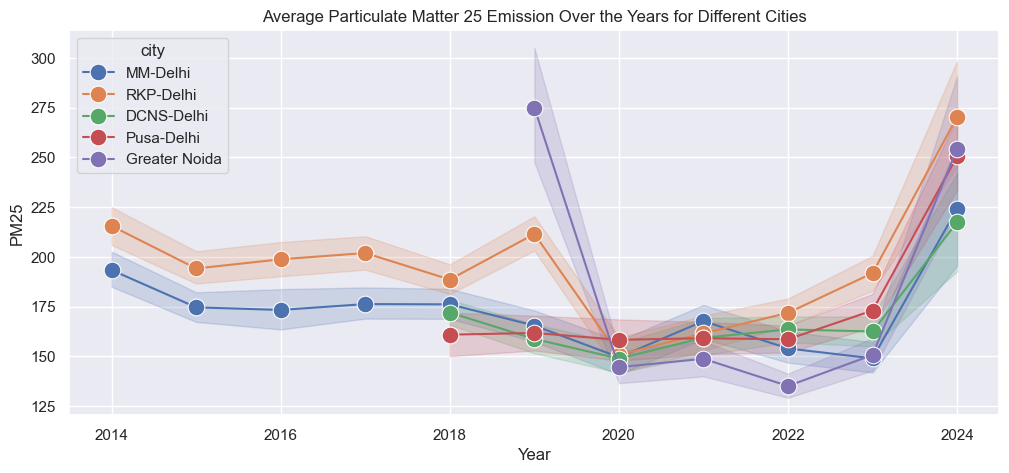

In [18]:
# Particulate Matter 25 Emission
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='pm25', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('PM25')
plt.title('Average Particulate Matter 25 Emission Over the Years for Different Cities')

# Show the plot
plt.show()

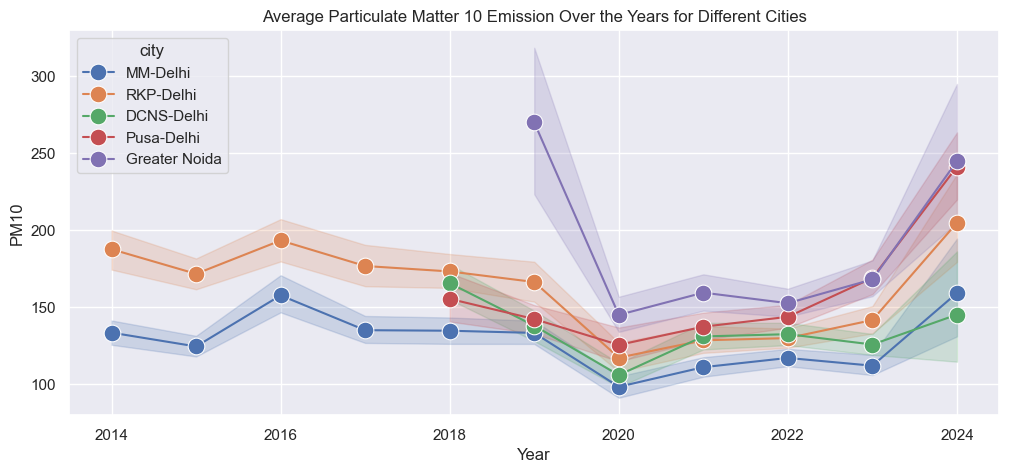

In [19]:
# Particulate Matter 10 Emission
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='pm10', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('PM10')
plt.title('Average Particulate Matter 10 Emission Over the Years for Different Cities')

# Show the plot
plt.show()

<Axes: >

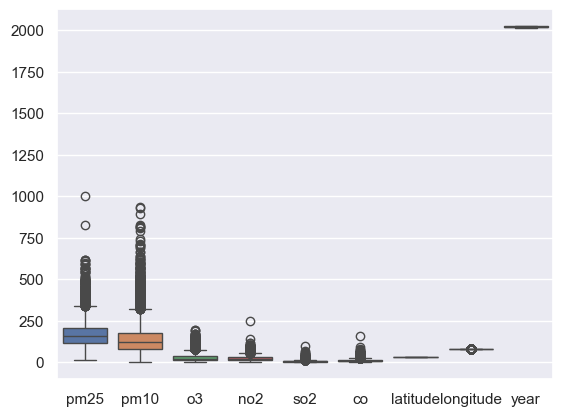

In [20]:
# boxplot
sns.boxplot(aq_df)


<Axes: ylabel='so2'>

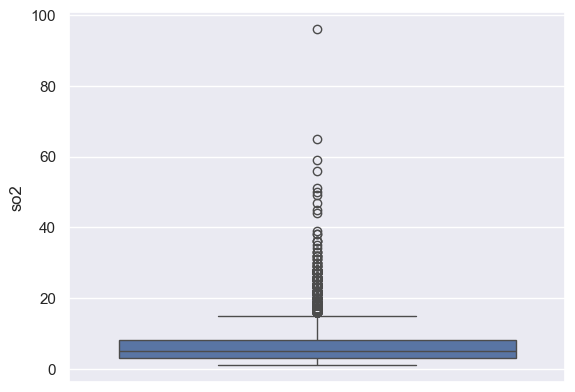

In [21]:
# Checking outliers
sns.boxplot(aq_df.so2)

<Axes: ylabel='so2'>

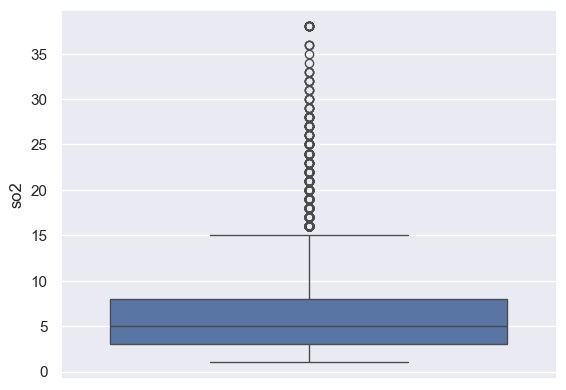

In [22]:
aq_df['so2'] = winsorize(aq_df['so2'], limits= [0.001,0.001])
# check outliers 
sns.boxplot(aq_df['so2'])

<Axes: ylabel='no2'>

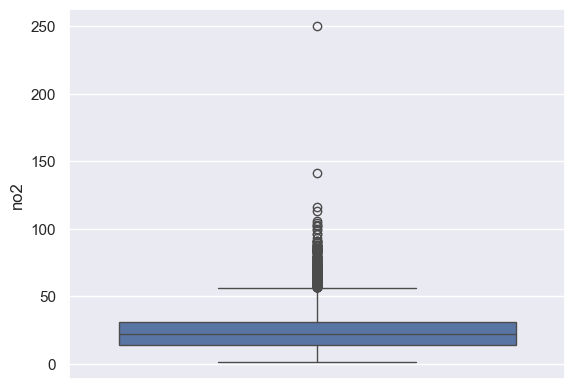

In [23]:
# Checking outliers
sns.boxplot(aq_df.no2)

<Axes: ylabel='no2'>

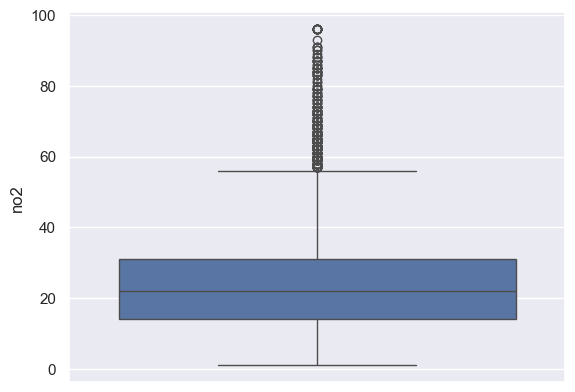

In [24]:
aq_df['no2'] = winsorize(aq_df['no2'], limits= [0.001,0.001])
# check outliers 
sns.boxplot(aq_df['no2'])

<Axes: ylabel='co'>

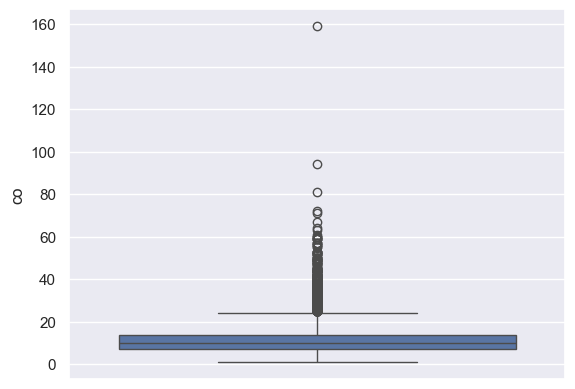

In [25]:
# Checking outliers
sns.boxplot(aq_df.co)

<Axes: ylabel='co'>

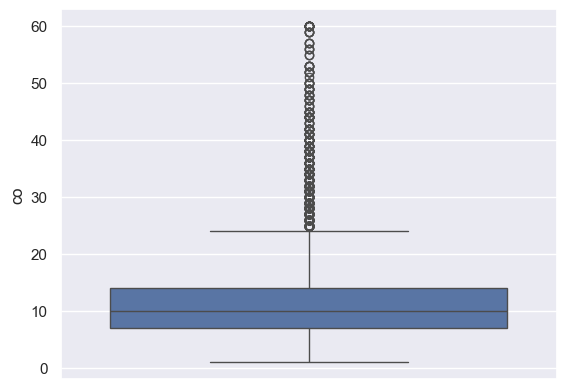

In [26]:
aq_df['co'] = winsorize(aq_df['co'], limits= [0.001,0.001])
# check outliers 
sns.boxplot(aq_df['co'])

<Axes: ylabel='o3'>

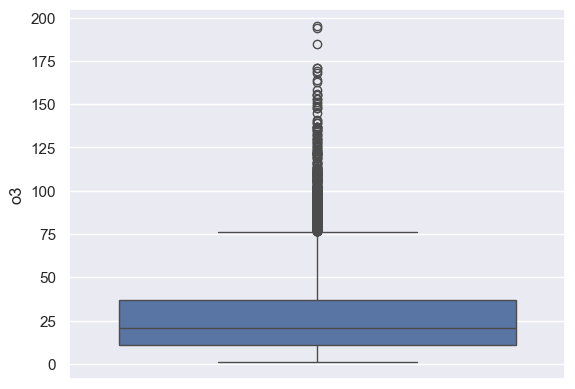

In [27]:
sns.boxplot(aq_df.o3)

In [28]:
#aq_df['o3'] = winsorize(aq_df['o3'], limits= [0.01,0.01])
# check outliers 
#sns.boxplot(aq_df['o3'])

<Axes: ylabel='pm10'>

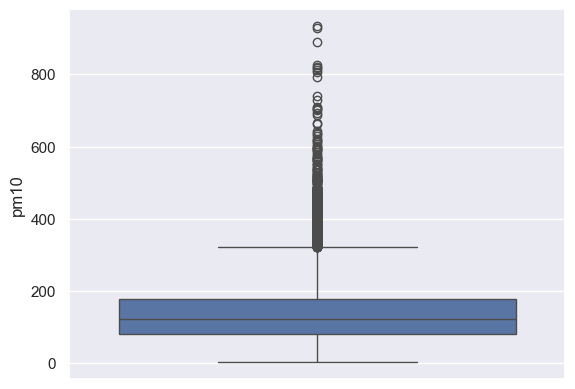

In [29]:
# checking outliers
sns.boxplot(aq_df.pm10)

<Axes: ylabel='no2'>

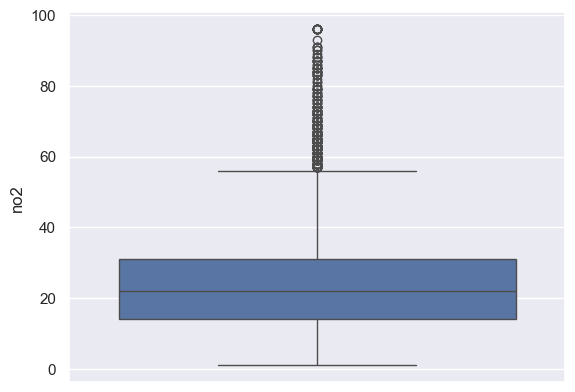

In [30]:
aq_df['no2'] = winsorize(aq_df['no2'], limits= [0.001,0.001])
# check outliers 
sns.boxplot(aq_df['no2'])

<Axes: ylabel='pm25'>

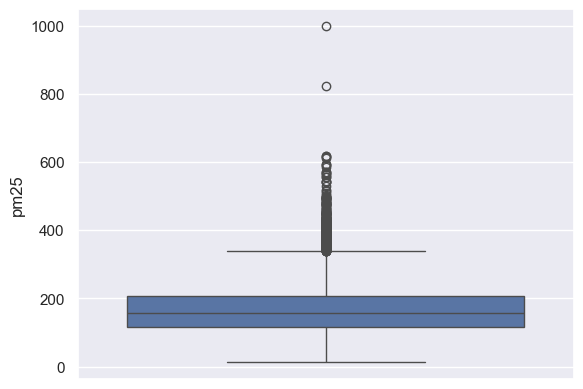

In [31]:
# checking outliers
sns.boxplot(aq_df.pm25)

<Axes: ylabel='pm25'>

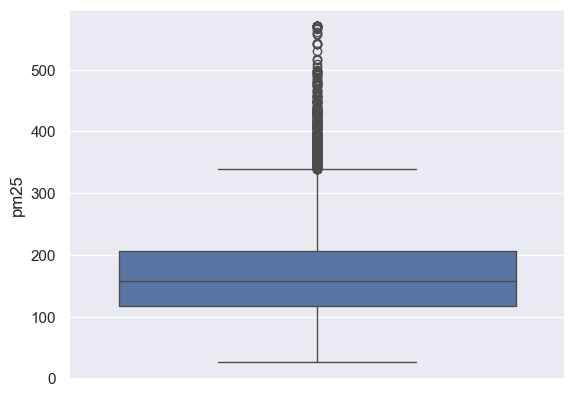

In [32]:
aq_df['pm25'] = winsorize(aq_df['pm25'], limits= [0.001,0.001])
# check outliers 
sns.boxplot(aq_df['pm25'])

<Axes: >

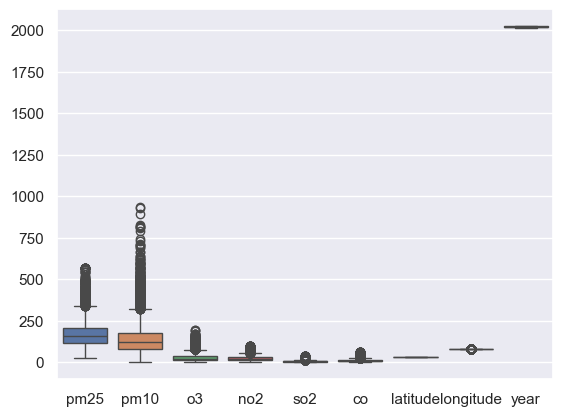

In [33]:
sns.boxplot(aq_df)

In [34]:
# Check for null values
aq_df.isnull().sum()

date         0
pm25         0
pm10         0
o3           0
no2          0
so2          0
co           0
city         0
latitude     0
longitude    0
year         0
dtype: int64

In [35]:
# check for duplicate values
aq_df.duplicated().sum()

0

# Calculate Air Quality Index

In [36]:
# Define AQI breakpoints and corresponding AQI values
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400)
    ]

In [37]:
def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

In [38]:
def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no2', 'o3', 'so2', 'pm25', 'pm10']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

In [39]:
# Calculate AQI for each row
aq_df['AQI'] = aq_df.apply(calculate_overall_aqi, axis=1)

In [40]:
# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]


In [41]:
def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

In [42]:
# Categorize AQI
aq_df['AQI_Category'] = aq_df['AQI'].apply(categorize_aqi)
aq_df

,date,pm25,pm10,o3,no2,so2,co,city,latitude,longitude,year,AQI,AQI_Category
2,2014-01-02,311.0,181.0,42.0,14.0,5.0,22.0,MM-Delhi,28.634100,77.200500,2014,400,Hazardous
3,2014-01-02,268.0,194.0,38.0,49.0,4.0,18.0,RKP-Delhi,28.564800,77.174400,2014,400,Hazardous
4,2014-01-03,266.0,253.0,37.0,63.0,7.0,29.0,RKP-Delhi,28.564800,77.174400,2014,400,Hazardous
5,2014-01-03,262.0,188.0,48.0,13.0,7.0,28.0,MM-Delhi,28.634100,77.200500,2014,400,Hazardous
6,2014-01-04,272.0,348.0,8.0,31.0,7.0,46.0,MM-Delhi,28.634100,77.200500,2014,400,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13165,2024-02-10,148.0,164.0,32.0,17.0,2.0,15.0,DCNS-Delhi,28.612498,77.237388,2024,300,Very Unhealthy
13166,2024-02-10,150.0,229.0,13.0,11.0,1.0,14.0,Pusa-Delhi,28.636997,77.172248,2024,300,Very Unhealthy
13167,2024-02-11,228.0,225.0,10.0,10.0,1.0,9.0,Pusa-Delhi,28.636997,77.172248,2024,300,Very Unhealthy
13170,2024-02-11,231.0,153.0,6.0,22.0,1.0,10.0,MM-Delhi,28.634100,77.200500,2024,300,Very Unhealthy


In [43]:
# check unique values in AQI_category
aq_df['AQI_Category'].value_counts()

Very Unhealthy                    4894
Unhealthy                         4681
Hazardous                         1788
Unhealthy for Sensitive Groups     227
Moderate                            55
Name: AQI_Category, dtype: int64

<Axes: xlabel='count', ylabel='AQI_Category'>

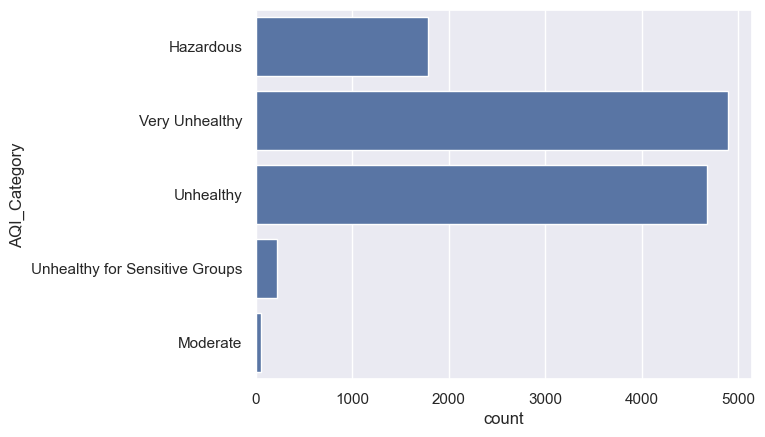

In [44]:
# countplot
sns.countplot(y='AQI_Category', data=aq_df)

In [45]:
# copy dataset
air_new = aq_df.copy()
air_new.head()

,date,pm25,pm10,o3,no2,so2,co,city,latitude,longitude,year,AQI,AQI_Category
2,2014-01-02,311.0,181.0,42.0,14.0,5.0,22.0,MM-Delhi,28.6341,77.2005,2014,400,Hazardous
3,2014-01-02,268.0,194.0,38.0,49.0,4.0,18.0,RKP-Delhi,28.5648,77.1744,2014,400,Hazardous
4,2014-01-03,266.0,253.0,37.0,63.0,7.0,29.0,RKP-Delhi,28.5648,77.1744,2014,400,Hazardous
5,2014-01-03,262.0,188.0,48.0,13.0,7.0,28.0,MM-Delhi,28.6341,77.2005,2014,400,Hazardous
6,2014-01-04,272.0,348.0,8.0,31.0,7.0,46.0,MM-Delhi,28.6341,77.2005,2014,400,Hazardous


In [46]:
# drop columns
air_new.drop(['city', 'year', 'date', 'pm10', 'AQI', 'latitude', 'longitude'],inplace=True, axis =1)

In [47]:
# view new cleaned dataset
air_new.head()

,pm25,o3,no2,so2,co,AQI_Category
2,311.0,42.0,14.0,5.0,22.0,Hazardous
3,268.0,38.0,49.0,4.0,18.0,Hazardous
4,266.0,37.0,63.0,7.0,29.0,Hazardous
5,262.0,48.0,13.0,7.0,28.0,Hazardous
6,272.0,8.0,31.0,7.0,46.0,Hazardous


# Column Transformer

In [48]:
# creating instances
ode =  OrdinalEncoder()
scaler = PowerTransformer(method='yeo-johnson')

In [49]:
# column transformer
ct = make_column_transformer(
    (ode, ['AQI_Category']),
    (scaler, ['co', 'o3', 'no2', 'so2', 'pm25']),
    remainder= 'passthrough')


In [50]:
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['AQI_Category']),
                                ('powertransformer', PowerTransformer(),
                                 ['co', 'o3', 'no2', 'so2', 'pm25'])])

In [51]:
# fit transform
air_new_df = ct.fit_transform(air_new)

In [52]:
# Get original column names
original_columns = ['AQI_Category', 'co', 'o3', 'no2', 'so2', 'pm25']


In [53]:
# Rename the columns in the resulting DataFrame
air_new_df.columns = original_columns

In [97]:
# view dataset
air_new_df.head()

,AQI_Category,co,o3,no2,so2,pm25
2,0.0,1.425576,0.871703,-0.674238,-0.042321,1.623333
3,0.0,1.069567,0.739618,1.610220,-0.341563,1.246680
4,0.0,1.914197,0.704785,2.190229,0.431321,1.228079
5,0.0,1.852270,1.051284,-0.781673,0.431321,1.190558
6,0.0,2.722952,-1.039348,0.665314,0.431321,1.283569


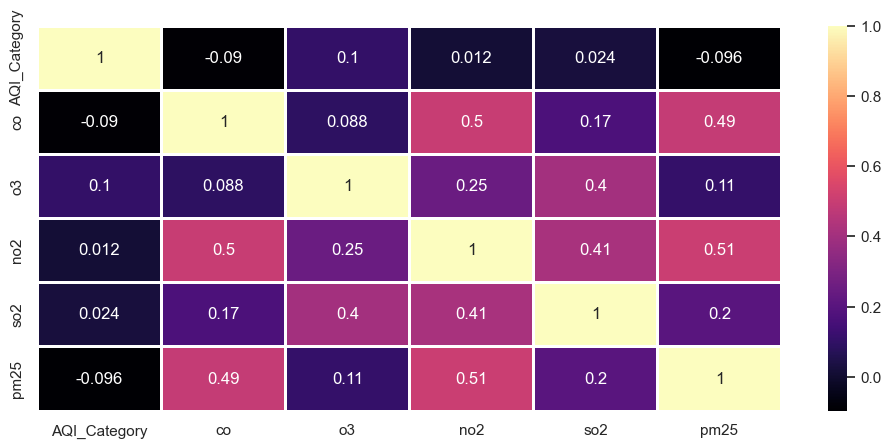

In [55]:
# Calculate the correlation coefficients
plt.figure(figsize = [12, 5], facecolor = 'white')
sns.heatmap(air_new_df.corr(), annot = True, linewidths = 2, cmap = "magma");

# Dataset split

In [56]:
# feature matrix and target variable
X =  air_new_df.drop(columns=['AQI_Category'])
y = air_new_df['AQI_Category']

In [57]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [58]:
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9316, 5)
X_test shape: (2329, 5)
y_train shape: (9316,)
y_test shape: (2329,)


<Axes: xlabel='pm25', ylabel='Density'>

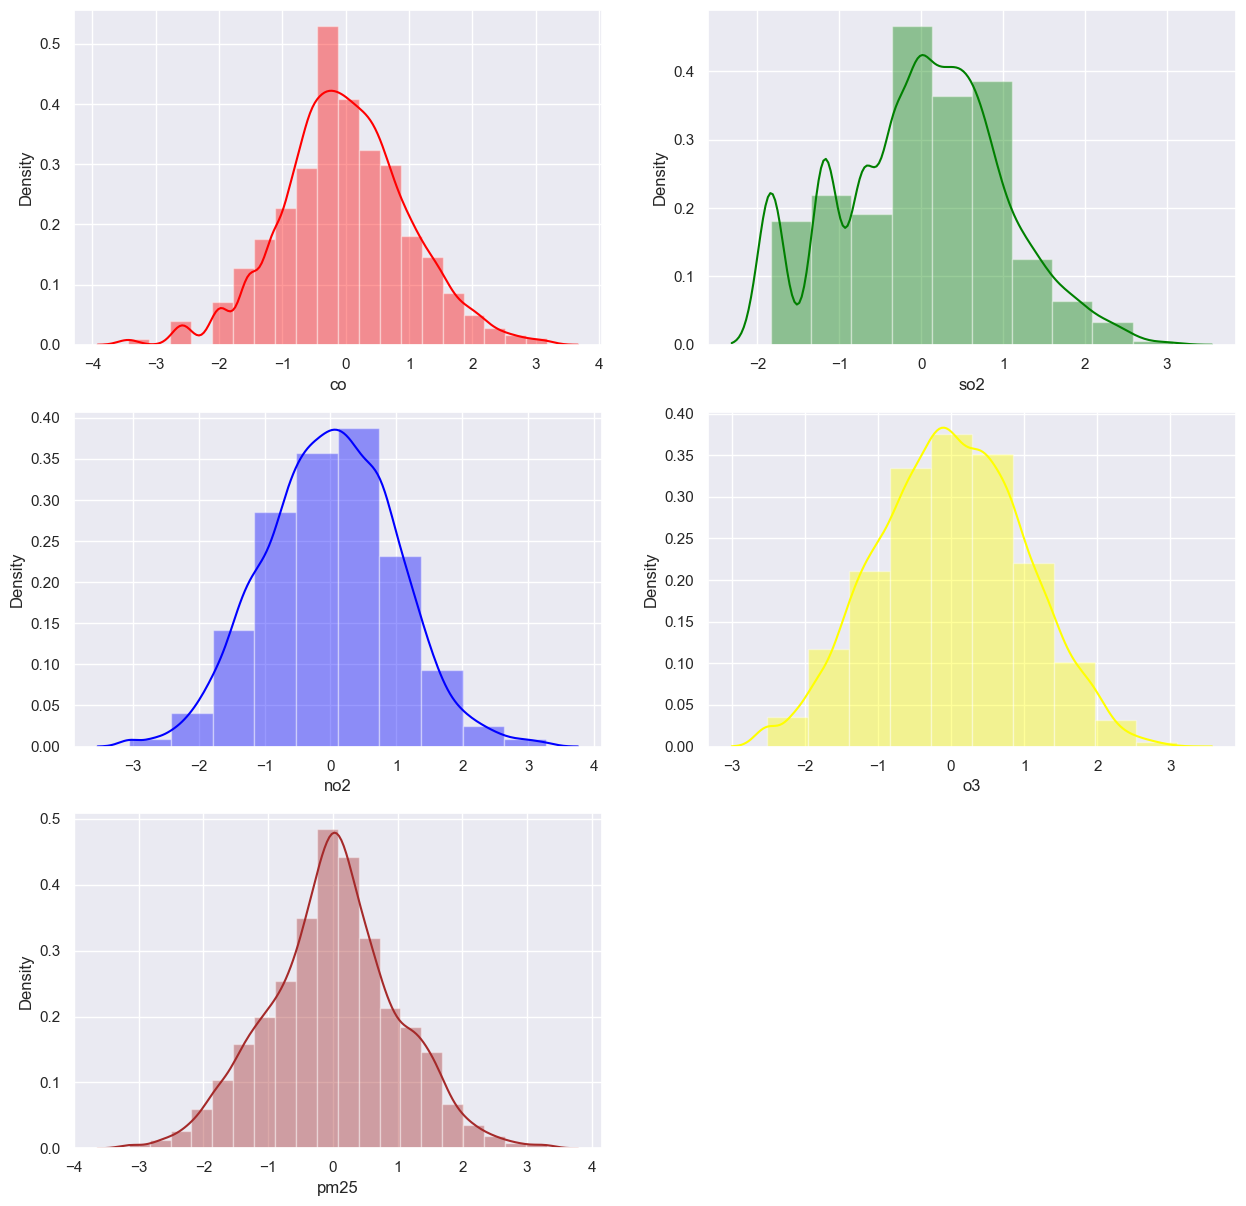

In [59]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(X_train['co'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(X_train['so2'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(X_train['no2'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(X_train['o3'],bins = 10, color = 'yellow')
plt.subplot(4,2,5)
sns.distplot(X_train['pm25'],bins = 20,color = 'brown')
#plt.subplot(4,2,6)
#sns.distplot(X_train['pm10'],bins = 20,color = 'orange')
#plt.show()

In [60]:
#X_train

# Get the feature names used during training
feature_names = X_train.columns
feature_names

Index(['co', 'o3', 'no2', 'so2', 'pm25'], dtype='object')

# Random Forest Classifier


In [61]:
# Use 'balanced' class weights in the classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training set
rf_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
rf_model.score(X_test, y_test)



0.9119793902962645

# Random Forest Random sampling

In [62]:
# Random Oversampling
rf_pipeline = make_pipeline(SMOTE(), rf_model)

# Step 3: Train your model using the training set with oversampling or undersampling
rf_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
yrf_pred = rf_pipeline.predict(X_test)

# Step 5: Evaluate model performance
s_accuracy = accuracy_score(y_test, yrf_pred)
print(f"Model Accuracy: {s_accuracy}")

Model Accuracy: 0.909832546157149


# Random Forest Learning Curve

In [63]:
# Create learning curve data
train_sizes, train_scores, test_scores = learning_curve(rf_pipeline, X, y,
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

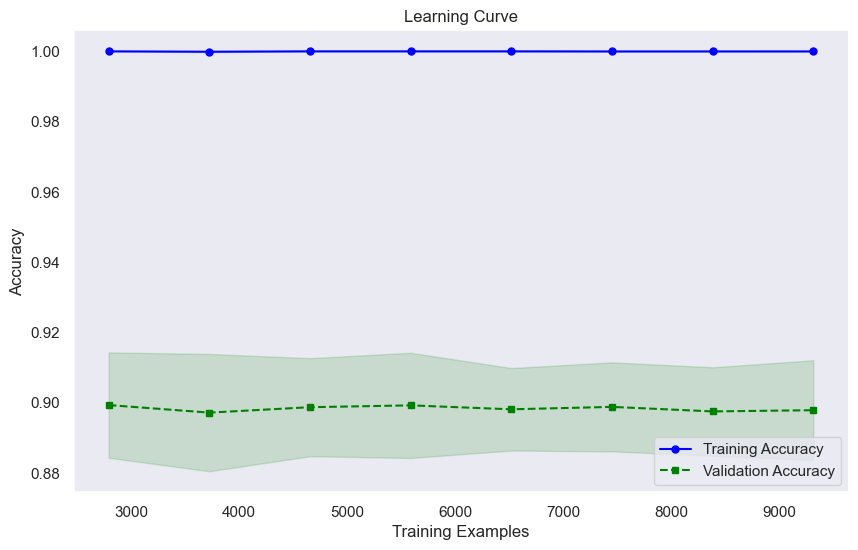

In [64]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# SVM

In [65]:
# Create an SVM classifier with balanced class weights
svm_model = SVC(class_weight='balanced', probability=True)

# Train the classifier on the training set
svm_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, svm_pred))


              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78       340
         1.0       0.21      0.47      0.29        15
         2.0       0.94      0.90      0.92       905
         3.0       0.47      0.88      0.61        48
         4.0       0.90      0.85      0.88      1021

    accuracy                           0.86      2329
   macro avg       0.65      0.78      0.69      2329
weighted avg       0.88      0.86      0.87      2329


# SVM Random sampling

In [66]:
# Random Oversampling
svm_pipeline = make_pipeline(SMOTE(), svm_model)

# Step 3: Train your model using the training set with oversampling or undersampling
svm_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
ysvm_pred = svm_pipeline.predict(X_test)

# Step 5: Evaluate model performance
svm_accuracy = accuracy_score(y_test, ysvm_pred)
print(f"Model Accuracy: {s_accuracy}")

Model Accuracy: 0.909832546157149


# Gaussian Naive's Bayes

In [67]:
# Use 'balanced' class weights in the classifier
nb_model = GaussianNB()

# Train the classifier on the training set
nb_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
nb_model.score(X_test, y_test)

0.8213825676255904

# Naive's Bayes (Gaussian) Random Sampling

In [68]:
# Random Oversampling
nb_pipeline = make_pipeline(SMOTE(), nb_model)

# Step 3: Train your model using the training set with oversampling or undersampling
nb_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
ynb_pred = nb_pipeline.predict(X_test)

# Step 5: Evaluate model performance
nb_accuracy = accuracy_score(y_test, ynb_pred)
print(f"Model Accuracy: {s_accuracy}")

Model Accuracy: 0.909832546157149


# KNN

In [69]:
# Use 'balanced' class weights in the classifier
knn_model = KNeighborsClassifier(n_neighbors=6)

# Train the classifier on the training set
knn_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
knn_model.score(X_test, y_test)

0.8432803778445684

# KNN Random Sampling

In [70]:
# Random Oversampling
knn_pipeline = make_pipeline(SMOTE(), knn_model)

# Step 3: Train your model using the training set with oversampling or undersampling
knn_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
yknn_pred = knn_pipeline.predict(X_test)

# Step 5: Evaluate model performance
knn_accuracy = accuracy_score(y_test, yknn_pred)
print(f"Model Accuracy: {knn_accuracy}")

Model Accuracy: 0.806784027479605


# MLP Classifier

In [71]:
# Use 'balanced' class weights in the classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=123)

# Train the classifier on the training set
mlp_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
mlp_model.score(X_test, y_test)

0.905968226706741

# MLP Random Sampling

In [72]:
# Random Oversampling
mlp_pipeline = make_pipeline(SMOTE(), mlp_model)

# Step 3: Train your model using the training set with oversampling or undersampling
mlp_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
ymlp_pred = mlp_pipeline.predict(X_test)

# Step 5: Evaluate model performance
mlp_accuracy = accuracy_score(y_test, ymlp_pred)
print(f"Model Accuracy: {mlp_accuracy}")

Model Accuracy: 0.8866466294547016


#  Ensemble - Voting Classifier

In [73]:
# Create a Voting Classifier with the individual classifiers as meta classifier
v_clf = VotingClassifier(estimators=[('rf', rf_pipeline),
                                     ('svm', svm_pipeline),
                                     ('nb', nb_pipeline),
                                     ('knn', knn_pipeline),
                                     ('mlp',mlp_pipeline)])

# Train the classifier on the training set
v_clf.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
v_clf.score(X_test, y_test)

0.8832116788321168

# Cross Validation

In [74]:
# Perform cross-validation
v_cv_scores = cross_val_score(v_clf, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {v_cv_scores}')
print(f'Mean CV Score: {v_cv_scores.mean()}')

Cross-Validation Scores: [0.88304721 0.87869028 0.88459474 0.88513151 0.88459474]
Mean CV Score: 0.8832116964884273


In [75]:
# calculate precision scores
precision_scores = cross_val_score(v_clf, X_train, y_train, cv=5,
                                   scoring='precision_macro')
print("Precision Scores:", precision_scores, "\n")
print("Mean Precision:", precision_scores.mean())

Precision Scores: [0.67028269 0.71303309 0.69246613 0.71294543 0.6994769 ] 

Mean Precision: 0.6976408477727446


In [76]:
# calculate recall scores
recall_scores = cross_val_score(v_clf, X_train, y_train, cv=5,
                                   scoring='recall_macro')
print("Recall Scores:", recall_scores, "\n")
print("Mean Recall:", recall_scores.mean())

Recall Scores: [0.79563053 0.85395152 0.82835686 0.86517724 0.79650485] 

Mean Recall: 0.8279241993501852


In [77]:
# calculate f1 scores
f1_scores = cross_val_score(v_clf, X_train, y_train, cv=5,
                                   scoring='f1_macro')
print("F1 Scores:", f1_scores, "\n")
print("Mean F1:", f1_scores.mean())

F1 Scores: [0.71087379 0.75773084 0.71478928 0.75807793 0.72397108] 

Mean F1: 0.733088584533611


In [78]:
# calculate f1 scores
acc_scores = cross_val_score(v_clf, X_train, y_train, cv=5,
                                   scoring='accuracy')
print("F1 Scores:", acc_scores, "\n")
print("Mean F1:", acc_scores.mean())

F1 Scores: [0.88358369 0.87761675 0.8835212  0.8819109  0.88674181] 

Mean F1: 0.8826748702425136


Confusion Matrix:
[[282  10   4   6  38]
 [  3   6   0   6   0]
 [  7   2 852  12  32]
 [  2   1   5  40   0]
 [ 84   6  52   2 877]]


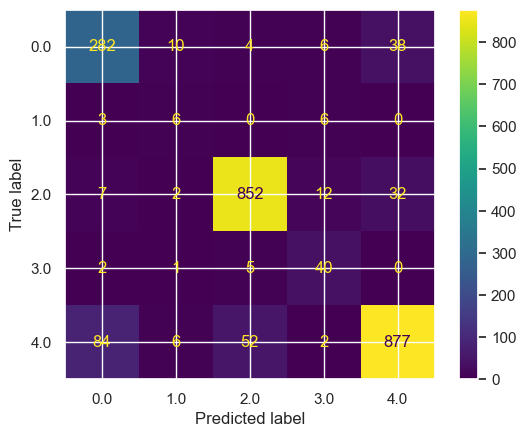

In [79]:
# Make predictions
vot_pred = v_clf.predict(X_test)

# Evaluate the model
vot_conf_mat = confusion_matrix(y_test, vot_pred, labels= v_clf.classes_)
print("Confusion Matrix:")
print(vot_conf_mat)

# display confusion matrix
vot_disp = ConfusionMatrixDisplay(confusion_matrix = vot_conf_mat,
                                 display_labels = v_clf.classes_
                                 )
vot_disp.plot()
plt.show()

In [80]:
# Apply SMOTE to oversample the minority classes
smote = SMOTE(sampling_strategy='auto',  k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.78      0.82       340
         1.0       0.32      0.40      0.35        15
         2.0       0.93      0.97      0.95       905
         3.0       0.63      0.83      0.72        48
         4.0       0.93      0.91      0.92      1021

    accuracy                           0.91      2329
   macro avg       0.74      0.78      0.75      2329
weighted avg       0.91      0.91      0.91      2329


# Stacking Ensemble

In [81]:
# Create a stacking classifier with base and meta classifiers
st_model = StackingClassifier(estimators=[('rf', rf_model),
                                     ('svm', svm_model),
                                     ('nb', nb_model),
                                     ('knn', knn_model),
                                     ('mlp',mlp_model)], final_estimator=RandomForestClassifier())
# Train the classifier on the training set
st_model.fit(X_train, y_train)
# Evaluate the accuracy of the classifier
st_model.score(X_test, y_test)

0.9167024474023185

In [82]:
# Create a stacking classifier with base and meta classifiers
model_st = StackingClassifier(estimators=[('rf', rf_pipeline),
                                     ('svm', svm_pipeline),
                                     ('nb', nb_pipeline),
                                     ('knn', knn_pipeline),
                                     ('mlp',mlp_pipeline)], final_estimator=RandomForestClassifier())
# Train the classifier on the training set
model_st.fit(X_train, y_train)
# Evaluate the accuracy of the classifier
model_st.score(X_test, y_test)

0.9128381279519107

In [83]:
#predict
st_pred = model_st.predict(X_test)
st_pred

array([4., 2., 4., ..., 4., 4., 0.])

In [84]:
# probability
st_proba = model_st.predict_proba(X_test)
st_proba

array([[0.07, 0.  , 0.  , 0.  , 0.93],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.02, 0.  , 0.  , 0.  , 0.98],
       ...,
       [0.1 , 0.  , 0.  , 0.  , 0.9 ],
       [0.16, 0.  , 0.  , 0.  , 0.84],
       [1.  , 0.  , 0.  , 0.  , 0.  ]])

In [85]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, st_pred, labels = model_st.classes_)
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[257   4   7   3  69]
 [  4   2   0   5   4]
 [  0   0 882   8  15]
 [  2   0   7  38   1]
 [ 12   1  59   2 947]]


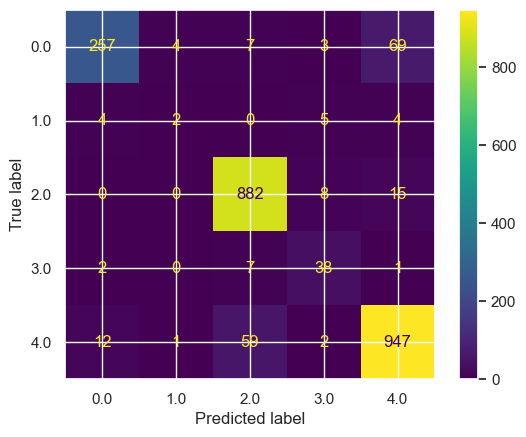

In [86]:
# display confusion matrix
st_disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat,
                                 display_labels = model_st.classes_)
st_disp.plot()
plt.show()

In [87]:
# Accuracy Score
stacking_accuracy = accuracy_score(y_test, st_pred)
print("Accuracy Score:", stacking_accuracy)

Accuracy Score: 0.9128381279519107


In [88]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, st_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9789194216684265


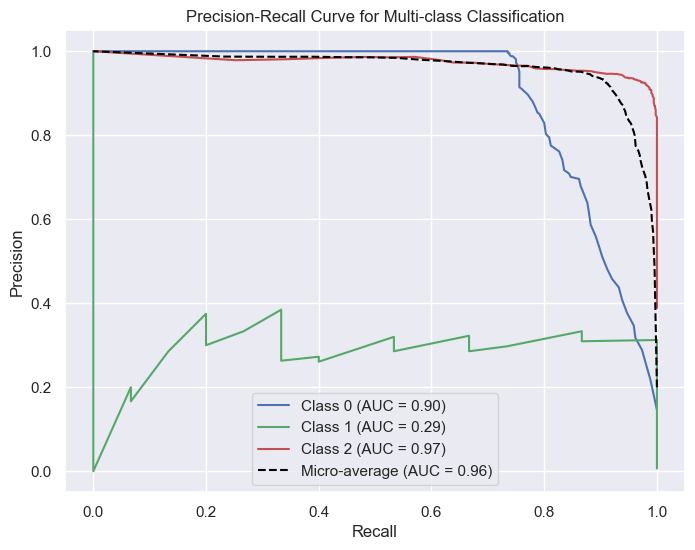

In [89]:
# Precision Recall Curve
from sklearn.preprocessing import label_binarize
# Convert the target variable to a binary format
y_binary = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  # Adjust the classes based on your actual data
# Initialize variables for precision-recall
precision = dict()
recall = dict()
average_precision = dict()

# Calculate precision and recall for each class
for i in range(y_binary.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_binary[:, i], st_proba[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# Compute micro-average precision-recall curve and area the curve
precision["micro"], recall["micro"], _ = precision_recall_curve(y_binary.ravel(), st_proba.ravel())
average_precision["micro"] = auc(recall["micro"], precision["micro"])

# Plot the Precision-Recall curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r']  # Adjust the colors based on the number of classes

for i, color in zip(range(y_binary.shape[1]), colors):
    plt.plot(recall[i], precision[i], color=color, label=f'Class {i} (AUC = {average_precision[i]:.2f})')

# Plot the micro-average Precision-Recall curve
plt.plot(recall["micro"], precision["micro"], label=f'Micro-average (AUC = {average_precision["micro"]:.2f})', linestyle='--', color='black')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-class Classification')
plt.legend()
plt.show()

# Cross Validation for Stacking Ensemble

In [90]:
# Perform cross-validation
st_cv_scores = cross_val_score(model_st, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {st_cv_scores}')
print(f'Mean CV Score: {st_cv_scores.mean()}')

Cross-Validation Scores: [0.91577253 0.91411702 0.91250671 0.91626409 0.91411702]
Mean CV Score: 0.9145554726213432


In [91]:
# calculate precision scores
st_precision_scores = cross_val_score(model_st, X_train, y_train, cv=5,
                                   scoring='precision_macro')
print("Precision Scores:", st_precision_scores, "\n")
print("Mean Precision:", st_precision_scores.mean())


Precision Scores: [0.72242778 0.814743   0.71890762 0.88922419 0.69261999] 

Mean Precision: 0.7675845141714526


In [92]:
# calculate recall scores
st_recall_scores = cross_val_score(model_st, X_train, y_train, cv=5,
                                scoring='recall_macro')
print("Recall Scores:", st_recall_scores, "\n")
print("Mean Recall:", st_recall_scores.mean())

Recall Scores: [0.71484437 0.69817207 0.71555615 0.74527328 0.67276034] 

Mean Recall: 0.7093212404182375


In [93]:
# calculate f1 scores
st_f1_scores = cross_val_score(model_st, X_train, y_train, cv=5,
                            scoring='f1_macro')
print("F1 Scores:", st_f1_scores, "\n")
print("Mean F1:", st_f1_scores.mean())

F1 Scores: [0.73165518 0.7083124  0.68010862 0.78235138 0.7213717 ] 

Mean F1: 0.7247598552727057


In [94]:
# calculate f1 scores
st_acc_scores = cross_val_score(model_st, X_train, y_train, cv=5,
                             scoring='accuracy')


In [95]:
print("Accuracy Scores:", st_acc_scores, "\n")
print("Mean Accuracy:", st_acc_scores.mean())

Accuracy Scores: [0.91684549 0.9178744  0.91411702 0.91465378 0.91143317] 

Mean Accuracy: 0.9149847723571055
